<img src="digplexq-logo.png" width="320px" align="left"></img>
<br><br><br>
<hr>

## Tutorial

DigplexQ is a package to perform computation with digraph-based complexes (e.g. directed flag complexes and path complexes).

<b>Contents</b>
1. Directed Flag Complexes
2. q-Adjancy Matrices
3. Path Complexes
4. Substructure Enumeration
5. Structure-Based Simplicial Measures
6. Combinatorial Hodge Laplacian
7. Spectrum-Based Measures
8. Persistent Homology
9. Persistent Path Homology (soon)

<hr>

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

from digplexq.structure_based_simplicial_distances import *
from digplexq.structure_based_simplicial_measures import *
from digplexq.spectrum_based_simplicial_measures import *
from digplexq.substructure_enumeration import *
from digplexq.digraph_based_complexes import *
from digplexq.directed_q_analysis import *
from digplexq.persistent_homology import *
from digplexq.simplicial_weights import *
from digplexq.random_digraphs import *
from digplexq.utils import *

## Directed Flag Complexes

In [2]:
#Create a Erdos-Renyi G(n,M) random digraph.

M = directed_erdos_renyi_GnM_model(20, 40, weight=False)
M = remove_double_edges(M) #remove double edges.

M2 = directed_erdos_renyi_GnM_model(20, 40, weight=False)
M2 = remove_double_edges(M2) #remove double edges.

Mw = directed_erdos_renyi_GnM_model(20, 40, weight=True)
Mw = remove_weighted_double_edges(Mw) #remove double edges based on edge weights.

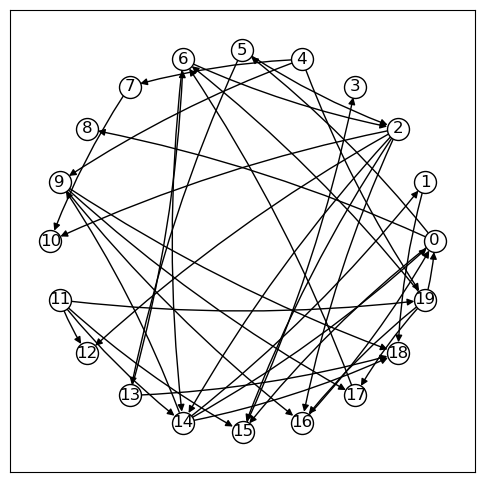

In [3]:
#Visualize the digraph.

G = nx.from_numpy_matrix(M, create_using=nx.DiGraph())
plt.figure(3,figsize=(6,6))#, dpi=300)
nx.draw_networkx(G, pos=nx.circular_layout(G), node_color="#ffffff", node_size=250, 
        connectionstyle='arc3, rad = 0.06', with_labels=True, edgecolors='black')

In [18]:
#Computing the directed flag complex of M

DFC_dim_nodes = DirectedFlagComplex(M, "by_dimension_with_nodes") #include the nodes.
DFC_dim_none = DirectedFlagComplex(M, "by_dimension_without_nodes") #does not include the nodes.
print(DFC_dim_none)

[[[0, 5], [0, 8], [14, 0], [0, 15], [16, 0], [19, 0], [14, 1], [1, 18], [5, 2], [6, 2], [2, 10], [2, 12], [2, 14], [2, 15], [2, 16], [15, 3], [4, 7], [4, 9], [4, 19], [5, 13], [13, 6], [6, 14], [17, 6], [19, 6], [7, 10], [14, 9], [9, 16], [9, 17], [9, 18], [11, 12], [11, 14], [11, 15], [11, 19], [13, 18], [14, 18], [19, 16], [19, 17]], [[19, 16, 0], [14, 1, 18], [6, 2, 14], [19, 17, 6], [14, 9, 18]]]


In [5]:
MS = MaximalSimplices(DFC_dim_none)
print(MS)

[[[0, 5], [0, 8], [14, 0], [0, 15], [5, 2], [2, 10], [2, 12], [2, 15], [2, 16], [15, 3], [4, 7], [4, 9], [4, 19], [5, 13], [13, 6], [7, 10], [9, 16], [9, 17], [11, 12], [11, 14], [11, 15], [11, 19], [13, 18]], [[19, 16, 0], [14, 1, 18], [6, 2, 14], [19, 17, 6], [14, 9, 18]]]


## q-Adjancy Matrices

In [7]:
#Computing Hq for q=0,1,2,3,...
#Function: q_adjacency_matrix(DFC_dim_none, DFC_dim_nodes, q).
#Input: directed flag complexes.

#q=0
H_0 = q_adjacency_matrix(DFC_dim_none, DFC_dim_nodes, 0)

#q=1
H_1 = q_adjacency_matrix(DFC_dim_none, DFC_dim_nodes, 1)

#q=2
H_2 = q_adjacency_matrix(DFC_dim_none, DFC_dim_nodes, 2)

In [8]:
H_1

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [9]:
#Another option: fast_q_adjacency_matrix().
#Input: adjacency matrix.

fast_q_adjacency_matrix(M, q=1)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [10]:
#Weighted q-Adjancy Matrices

#Function: weighted_q_adjacency_matrix(M, DFC_dim_none, DFC_dim_nodes, q)

#q=1
Hw_1 = weighted_q_adjacency_matrix(Mw, DFC_dim_none, DFC_dim_nodes, 1)

#q=2
Hw_2 = weighted_q_adjacency_matrix(Mw, DFC_dim_none, DFC_dim_nodes, 2)

In [11]:
Hw_1

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

## Path Complexes

In [20]:
#Computing the path complex of M
#Function: PathComplex(M, n)

PC = PathComplex(M, 5) #retrieve paths with lengths up to n=5.

#Example: 2-paths
print("2-paths: \n", PC[1])

2-paths: 
 [[[0, 5, 2]], [[0, 15, 3]], [[0, 5, 13]], [[2, 14, 1]], [[2, 15, 3]], [[2, 14, 9]], [[2, 14, 18]], [[4, 19, 0]], [[4, 19, 6]], [[4, 7, 10]], [[4, 9, 18]], [[5, 13, 6]], [[5, 2, 10]], [[5, 2, 12]], [[5, 2, 14]], [[5, 2, 15]], [[5, 2, 16]], [[5, 13, 18]], [[6, 14, 0]], [[6, 14, 1]], [[6, 14, 9]], [[6, 2, 10]], [[6, 2, 12]], [[6, 2, 14]], [[6, 2, 15]], [[6, 2, 16]], [[6, 14, 18]], [[9, 16, 0]], [[9, 17, 6]], [[11, 14, 1]], [[11, 15, 3]], [[11, 19, 6]], [[11, 14, 9]], [[11, 19, 16]], [[11, 19, 17]], [[11, 14, 18]], [[13, 6, 2]], [[13, 6, 14]], [[14, 0, 5]], [[14, 0, 8]], [[14, 0, 15]], [[14, 9, 16]], [[14, 9, 17]], [[16, 0, 5]], [[16, 0, 8]], [[16, 0, 15]], [[17, 6, 2]], [[17, 6, 14]], [[19, 16, 0]], [[19, 6, 2]], [[19, 0, 5]], [[19, 17, 6]], [[19, 0, 8]], [[19, 6, 14]], [[19, 0, 15]], [[2, 14, 0]], [[2, 16, 0]], [[4, 9, 16]], [[4, 19, 16]], [[4, 9, 17]], [[4, 19, 17]], [[11, 14, 0]], [[11, 19, 0]], [[14, 1, 18]], [[14, 9, 18]]]


## Substructure Enumeration

In [27]:
#Number of directed cliques

count_directed_n_cliques(DFC_dim_none)

[37, 5]

In [22]:
#Weakly q-connected components

wcc = count_weakly_q_connected_components(M) #if q=None, the computation if performed on the original digraph.
wcc_1 = count_weakly_q_connected_components(M, q=1)
wcc_2 = count_weakly_q_connected_components(M, q=2)

print(wcc)
print(wcc_1)
print(wcc_2)

[1]
[1, 2, 3, 4]
[1]


In [23]:
#Strongly q-connected components

scc = count_strongly_q_connected_components(M) #if q=None, the computation if performed on the original digraph.
scc_1 = count_strongly_q_connected_components(M, q=1)
scc_2 = count_strongly_q_connected_components(M, q=2)

print(scc)
print(scc_1)
print(scc_2)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1, 2, 3, 4]
[1]


In [24]:
#Counting n-paths

count_paths = count_n_paths(PC) #PC = path complex.
print(count_paths)

[37, 65, 109, 171]


In [25]:
#Enumerate all the invariant elementary n-paths

enumerate_invariant_elementary_n_paths(PC, 2) #n=2

[[6, 2, 14], [19, 16, 0], [19, 17, 6], [14, 1, 18], [14, 9, 18]]

In [26]:
#Counting the invariant elementary n-paths

count_elmentary_directed_quasi_cliques(PC, 2) #n=2

5

## Structure-Based Measures

In [29]:
#in-q-Degree Centrality

#If q=None, the computation is performed on the original digraph.
#If results="max", it returns the maximum in-degree among all nodes.
in_q_deg = in_q_degree_centrality(M, q=None, results="max") 

#q=1
#If results="nodes", it returns the in-degree of each node.
in_q_deg_1 = in_q_degree_centrality(M, q=1, results="nodes")

#q=2
in_q_deg_2 = in_q_degree_centrality(M, q=2, results="nodes")

print(in_q_deg) 
print(in_q_deg_1) 
print(in_q_deg_2)

0.21052631578947367
{0: 0.0, 1: 0.25, 2: 0.0, 3: 0.0, 4: 0.25}
{0: 1}


In [31]:
#out-q-Degree Centrality

#q=1
out_q_deg_1 = out_q_degree_centrality(M, q=1, results="max")

#q=2
out_q_deg_2 = out_q_degree_centrality(M, q=2, results="nodes")

print(out_q_deg_1) 
print(out_q_deg_2)

1
{0: 1}


In [32]:
#q-Betweenness Centrality

#q=1
bc_1 = q_betweenness_centrality(M, q=1)

#q=2
bc_2 = q_betweenness_centrality(M, q=2)

print(bc_1)
print(bc_2)

{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0}
{0: 0.0}


In [33]:
#q-Harmonic Centrality

#q=1
hc_1 = q_harmonic_centrality(M, q=1) #default: results="nodes"

#q=3
hc_3 = q_harmonic_centrality(M, q=3, results="max")

print(hc_1)
print(hc_3)

{0: 0, 1: 1.0, 2: 0, 3: 0, 4: 1.0}
0


In [34]:
#q-Katz Centrality

#q=1
q_katz_centrality(M, q=1)

{0: 0.4276029043310218,
 1: 0.47511433814557985,
 2: 0.4276029043310218,
 3: 0.4276029043310218,
 4: 0.47511433814557985}

In [35]:
#q-Structural Entropy

#q=1
q_structural_entropy(M, q=2)

0

In [37]:
#q-Returnability

#q=1
q_returnability(M, q=1)

1.0

## Structure-Based Distances

In [38]:
#First topological distance

first_topological_distance(M, M2)

0.0791

In [39]:
#Fourth topological distance

fourth_topological_distance(M, M2)

0.0

In [47]:
#Histogram Cosine Kernel (HCK)

histogram_cosine_kernel(M, M2)

0.991184

In [48]:
#Jaccard Kernel

jaccard_kernel(M, M2)

0.98936

## Combinatorial Hodge Laplacian

In [40]:
M1 = directed_erdos_renyi_GnM_model(20, 40, weight=False)
M2 = directed_erdos_renyi_GnM_model(20, 40, weight=False)

DFC_dim_none_1 = DirectedFlagComplex(M1, "by_dimension_without_nodes")
MaxSimp_1 = MaximalSimplices(DFC_dim_none_1)

DFC_dim_none_2 = DirectedFlagComplex(M2, "by_dimension_without_nodes")
MaxSimp_2 = MaximalSimplices(DFC_dim_none_2)

In [41]:
#Function: hodge_q_laplacian(MaxSimp, q)

L1_1 = hodge_q_laplacian(MaxSimp_1, 1)
L1_2 = hodge_q_laplacian(MaxSimp_1, 2)

L2_1 = hodge_q_laplacian(MaxSimp_2, 1)
L2_2 = hodge_q_laplacian(MaxSimp_2, 2)

In [43]:
L1_1

array([[2., 0., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       [0., 0., 2., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 3., 0., 0.],
       [0., 0., 0., ..., 0., 3., 0.],
       [0., 0., 0., ..., 0., 0., 2.]])

## Spectrum-Based Measures

In [44]:
#q-Energy

#q=1
en_1 = q_energy(M1, q=1)

#q=2
en_2 = q_energy(M1, q=2)

print(en_1, en_2)

1.0 0.0


In [45]:
#Function: spectral_n_density(L, b=1)

q_spectral_density(L1_1)

array([[ 0.03207904,  0.00361242, -0.00038468, ..., -0.00040117,
        -0.00040117, -0.00506015],
       [ 0.00361242,  0.03741295,  0.00316211, ..., -0.00066305,
        -0.00066305, -0.00196107],
       [-0.00038468,  0.00316211,  0.04234233, ..., -0.00304217,
        -0.00304217,  0.00071794],
       ...,
       [-0.00040117, -0.00066305, -0.00304217, ...,  0.01739944,
         0.00856088, -0.0015953 ],
       [-0.00040117, -0.00066305, -0.00304217, ...,  0.00856088,
         0.01739944, -0.0015953 ],
       [-0.00506015, -0.00196107,  0.00071794, ..., -0.0015953 ,
        -0.0015953 ,  0.03541255]])

In [46]:
#q-von Neuman Entropy

q_vonNeuman_entropy(L1_1)

4.81756

In [47]:
#q-Spectral distance

q_spectral_distance(L1_1, L2_1)

0.23911

In [48]:
#q-Spectral distance

q_spectral_distance(L1_2, L2_2)

nan

## Persistent Homology

In [50]:
persistence_diagram(M1);

In [51]:
#Wasserstein distance

wasserstein_distance(M1, M2)

0.70711

In [52]:
#Bottleneck distance

bottleneck_distance(M1, M2)

0.5

In [53]:
#Betti distance

betti_distance(M1, M2)

1.0

In [54]:
#Silhouette distance

silhouette_distance(M1, M2)

0.0

In [56]:
print_digplexq()

  _____  _             _            ____   
 |  __ \(_)           | |          / __ \  
 | |  | |_  __ _ _ __ | | _____  _| |  | | 
 | |  | | |/ _` | '_ \| |/ _ \ \/ / |  | | 
 | |__| | | (_| | |_) | |  __/>  <| |__| | 
 |_____/|_|\__, | .__/|_|\___/_/\_\___\_\ 
            __/ | |                        
           |___/|_|                        
